In [30]:
import pandas as pd
import numpy as np

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv("E:\ML_project\Customer_Segementation_clustering\customer_segmentation.csv")

In [33]:
df.head()  # Display the first few rows of the DataFrame

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [34]:
df.columns  # List all columns in the DataFrame

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [35]:
df.shape

(2240, 29)

In [36]:
df.info()  # Get a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [37]:
df.isnull().sum()  # Check for missing values in each column

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [38]:
df.dropna(inplace=True)  # Drop rows with missing values

In [39]:
df.isnull().sum()  # Check for missing values in each column

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [40]:
df.shape

(2216, 29)

In [41]:
df.describe()  # Get descriptive statistics for numerical columns

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [42]:
df['Education'].value_counts()  # Count unique values in the 'Education' column

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [43]:
df["Marital_Status"].value_counts() # Count unique values in the 'Marital Status' column

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [44]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],dayfirst =True)  # Convert 'Dt_Customer' to datetime

In [45]:
df['Dt_Customer'].head()

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [47]:
df['Age'] = 2025 - df['Year_Birth']  # Calculate age from 'Year_Birth'

In [48]:
df['Age'].head()  # Display the first few rows of the 'Age' column

0    68
1    71
2    60
3    41
4    44
Name: Age, dtype: int64

In [49]:
df['Total_Children'] = df['Kidhome'] + df['Teenhome']  # Calculate total children

In [50]:
df['Total_Children'].head()  # Display the first few rows of the 'Total_Children' column

0    0
1    2
2    0
3    1
4    1
Name: Total_Children, dtype: int64

In [51]:
spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
              'MntSweetProducts', 'MntGoldProds']  # Columns related to spending

In [52]:
df["Total_Spending"] = df[spend_cols].sum(axis=1)  # Calculate total spending

In [53]:
df["Total_Spending"]

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Spending, Length: 2216, dtype: int64

In [54]:
df['Customer_Since'] = (pd.Timestamp('today') - pd.to_datetime(df['Dt_Customer'])).dt.days

In [55]:
df['Customer_Since']

0       4724
1       4174
2       4373
3       4200
4       4222
        ... 
2235    4442
2236    4080
2237    4216
2238    4217
2239    4683
Name: Customer_Since, Length: 2216, dtype: int64

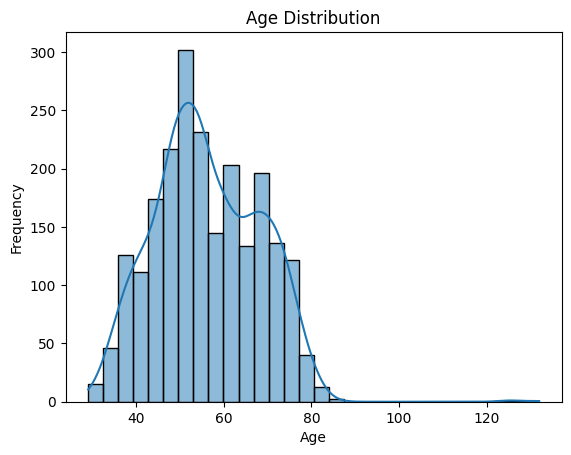

In [56]:
sns.histplot(df['Age'], bins=30,kde =True)  # Histogram of Age with KDE
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

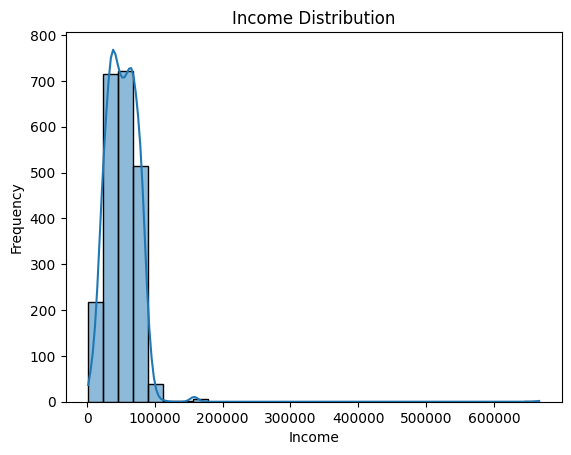

In [57]:
sns.histplot(df['Income'], bins=30, kde=True)  # Histogram of Age with KDE
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

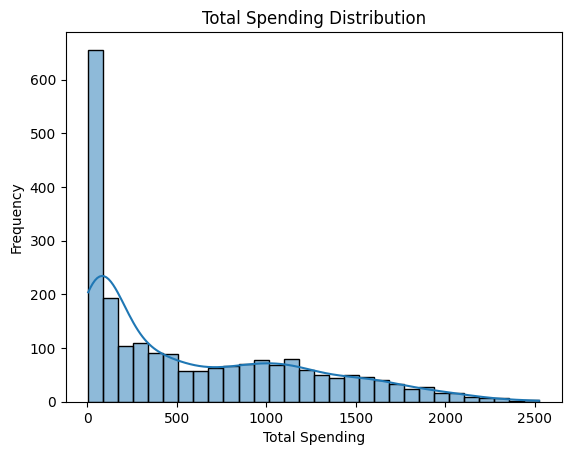

In [58]:
sns.histplot(df['Total_Spending'], bins=30, kde=True)  # Histogram of Total Children with KDE
plt.title('Total Spending Distribution')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.show()

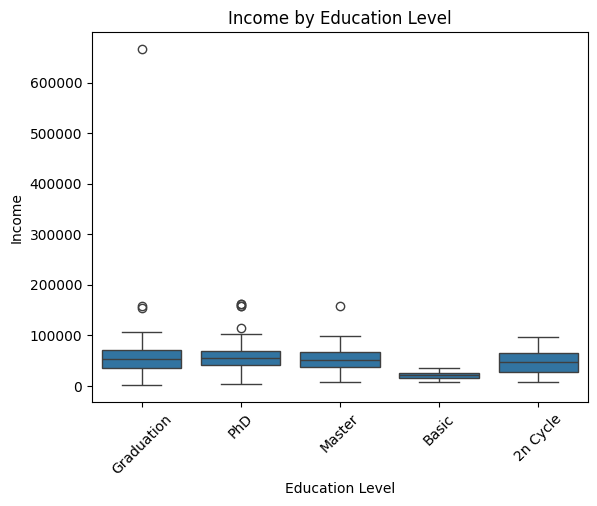

In [59]:
sns.boxplot(x='Education', y='Income', data=df)  # Boxplot of Income by Education
plt.title('Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()  

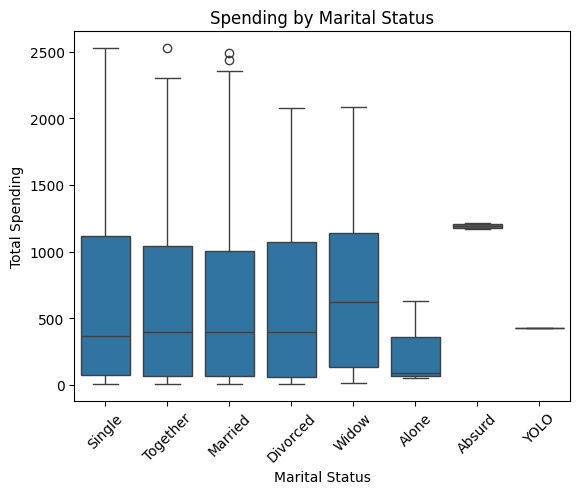

In [60]:
sns.boxplot(x='Marital_Status', y='Total_Spending', data=df)  # Boxplot of Income by Education
plt.title('Spending by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()  

In [61]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since'],
      dtype='object')

In [62]:
corr = df[['Income','Age','Recency','Total_Spending','NumWebPurchases','NumStorePurchases']].corr()

In [63]:
corr.head()

,Income,Age,Recency,Total_Spending,NumWebPurchases,NumStorePurchases
Income,1.000000,0.161791,-0.003970,0.667576,0.387878,0.529362
Age,0.161791,1.000000,0.016295,0.113487,0.153051,0.127891
Recency,-0.003970,0.016295,1.000000,0.020066,-0.005641,-0.000434
Total_Spending,0.667576,0.113487,0.020066,1.000000,0.528973,0.675181
NumWebPurchases,0.387878,0.153051,-0.005641,0.528973,1.000000,0.516240


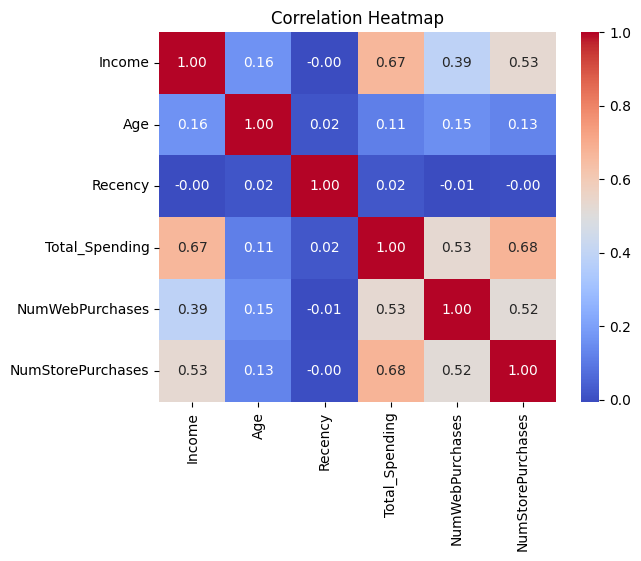

In [64]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')  # Correlation heatmap
plt.title('Correlation Heatmap')
plt.show()

In [65]:
pivot_income = df.pivot_table(values="Income",index="Education",columns="Marital_Status",aggfunc="mean")

In [66]:
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


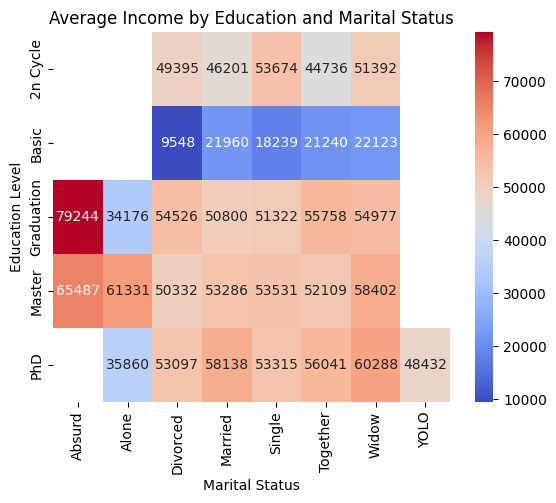

In [67]:
sns.heatmap(pivot_income, annot=True, cmap='coolwarm', fmt='.0f')  # Heatmap of average income by education and marital status
plt.title('Average Income by Education and Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Education Level')
plt.show()

In [68]:
group1 = df.groupby('Education')['Total_Spending'].mean().sort_values(ascending=False)

In [69]:
group1

Education
PhD           676.733888
Graduation    621.686380
Master        609.767123
2n Cycle      494.930000
Basic          81.796296
Name: Total_Spending, dtype: float64

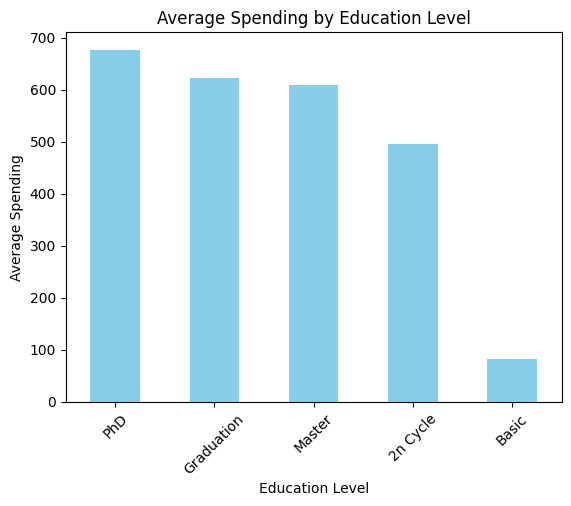

In [70]:
group1.plot(kind='bar',color = 'skyblue')  # Bar plot of average spending by education level
plt.title('Average Spending by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.show()   

In [71]:
df['AcceptedAny'] = df[['AcceptedCmp1',"AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].any(axis=1).astype(int)  # Create a new column indicating if any campaign was accepted

In [72]:
df["AcceptedAny"].unique()

array([1, 0])

In [73]:
group2 = df.groupby('Marital_Status')['AcceptedAny'].mean().sort_values(ascending=False)  # Group by Marital Status and calculate mean of AcceptedAny

In [74]:
group2

Marital_Status
Absurd      0.500000
YOLO        0.500000
Widow       0.342105
Alone       0.333333
Single      0.312102
Divorced    0.297414
Married     0.252042
Together    0.251309
Name: AcceptedAny, dtype: float64

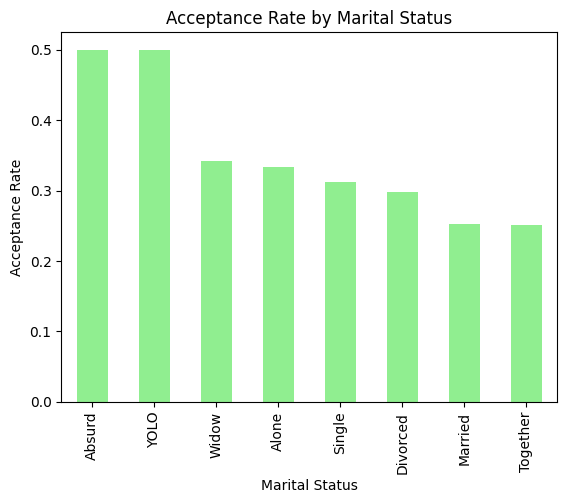

In [75]:
group2.plot(kind='bar', color='lightgreen')  # Bar plot of acceptance rate by marital status
plt.title('Acceptance Rate by Marital Status')
plt.xlabel('Marital Status')        
plt.ylabel('Acceptance Rate')

plt.show()  # Show the plot

In [76]:
bins = [18,30,40,50,60,70,90]

In [77]:
labels = ["18-29","30-39","40-49","50-59","60-69","70+"]

In [78]:
df["Age_Group"] = pd.cut(df['Age'], bins=bins, labels=labels)  # Create age groups

In [79]:
df["Age_Group"]

0       60-69
1         70+
2       50-59
3       40-49
4       40-49
        ...  
2235    50-59
2236      70+
2237    40-49
2238    60-69
2239      70+
Name: Age_Group, Length: 2216, dtype: category
Categories (6, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']

In [80]:
group3 = df.groupby('Age_Group')['Income'].mean().sort_values(ascending=False)  # Group by Age Group and calculate mean of AcceptedAny

C:\Users\User\AppData\Local\Temp\ipykernel_1328\3665647986.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3 = df.groupby('Age_Group')['Income'].mean().sort_values(ascending=False)  # Group by Age Group and calculate mean of AcceptedAny


In [81]:
group3

Age_Group
70+      58944.316294
60-69    56200.827887
50-59    50812.913303
40-49    49224.877034
18-29    46658.000000
30-39    46283.028302
Name: Income, dtype: float64

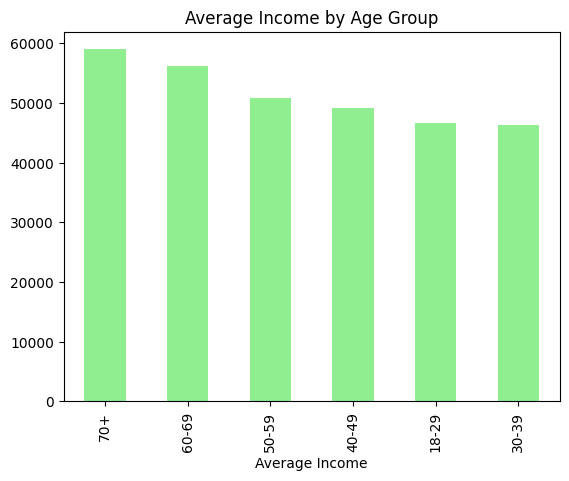

In [82]:
group3.plot(kind='bar', color='lightgreen')  # Bar plot of acceptance rate by marital status
plt.title('Average Income by Age Group')
plt.xlabel('Average Income') 
plt.show()  # Show the plot   

In [83]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since',
       'AcceptedAny', 'Age_Group'],
      dtype='object')

In [84]:
features = ["Age","Income","Total_Spending","NumWebPurchases","NumStorePurchases","NumWebVisitsMonth","Recency"]

In [85]:
X = df[features]

In [86]:
X

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,68,58138.0,1617,8,4,7,58
1,71,46344.0,27,1,2,5,38
2,60,71613.0,776,8,10,4,26
3,41,26646.0,53,2,4,6,26
4,44,58293.0,422,5,6,5,94
...,...,...,...,...,...,...,...
2235,58,61223.0,1341,9,4,5,46
2236,79,64014.0,444,8,5,7,56
2237,44,56981.0,1241,2,13,6,91
2238,69,69245.0,843,6,10,3,8


In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # Initialize the scaler

In [88]:
X_scaled = scaler.fit_transform(X)  # Fit and transform the features

In [89]:
X_scaled

array([[ 0.98644293,  0.2340627 ,  1.67548812, ..., -0.55414289,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.96235832, ..., -1.16951781,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.28024985, ...,  1.29198186,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.05169551, ...,  2.21504423,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.39140438, ...,  1.29198186,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.7218    , ..., -0.55414289,
         0.69323197, -0.31140528]])

In [90]:
from sklearn.cluster import KMeans

In [91]:
wcss = []

In [92]:
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)  # Fit the KMeans model
    wcss.append(kmeans.inertia_)  # Append the inertia (WCSS) to the list

In [93]:
wcss

[10218.620143748783,
 9007.786818672808,
 8395.849111247971,
 7772.508271234327,
 7166.04045840111,
 6710.103280852858,
 6454.458995685548,
 5881.051184578473]

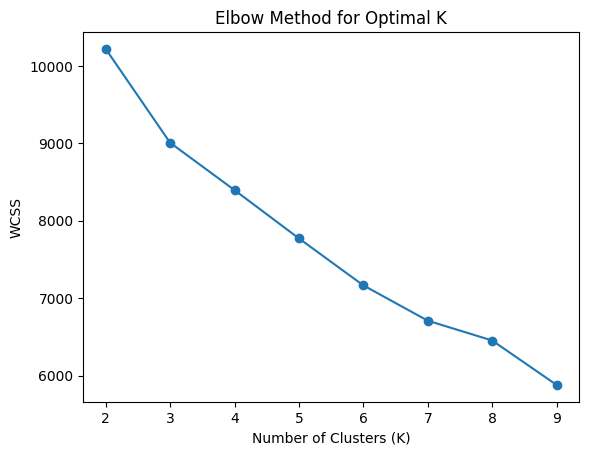

In [94]:
plt.plot(range(2, 10), wcss, marker='o')  # Plot WCSS against number of clusters
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()  # Show the plot

In [95]:
kmeans = KMeans(n_clusters=6)  # Initialize KMeans with optimal number of clusters
df['Cluster'] = kmeans.fit_predict(X_scaled)  # Fit the model and assign cluster labels

In [96]:
df['Cluster'] # Count the number of samples in each cluster

0       4
1       3
2       4
3       2
4       0
       ..
2235    4
2236    4
2237    5
2238    1
2239    3
Name: Cluster, Length: 2216, dtype: int32

In [97]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,AcceptedAny,Age_Group,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,68,0,1617,4724,1,60-69,4
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,71,2,27,4174,0,70+,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,60,0,776,4373,0,50-59,4
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,41,1,53,4200,0,40-49,2
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,44,1,422,4222,0,40-49,0


In [98]:
cluster_summary = df.groupby('Cluster')[features].mean()  # Calculate mean of features for each cluster

In [99]:
cluster_summary

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,49.160326,32944.277174,124.067935,2.366848,3.228261,7.076087,77.116848
1,52.175926,78033.984568,1254.246914,4.719136,8.780864,2.679012,26.632716
2,48.685268,32481.035714,106.823661,2.149554,3.196429,6.676339,24.787946
3,68.312500,43730.546875,172.725000,2.537500,4.053125,5.290625,50.971875
4,59.964539,59643.283688,896.468085,7.933806,7.872340,6.413712,44.718676
5,61.447447,73870.918919,1233.966967,4.570571,8.297297,2.756757,75.891892


In [100]:
df['Cluster'].value_counts()  # Count the number of samples in each cluster

Cluster
2    448
4    423
0    368
5    333
1    324
3    320
Name: count, dtype: int64

In [101]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Initialize PCA to reduce to 2 dimensions
pca_data = pca.fit_transform(X_scaled)  # Fit and transform the scaled data

df["PCA1"],df["PCA2"] = pca_data[:,0],pca_data[:,1]

In [108]:
pca_data

array([[ 1.1075188 , -0.21175951],
       [-1.33673385,  0.269839  ],
       [ 1.88227676, -1.01416098],
       ...,
       [ 1.1535966 ,  1.15056999],
       [ 1.88768024, -1.16073698],
       [-0.84182091, -0.15963623]])

In [109]:
df["PCA1"]

0       1.107519
1      -1.336734
2       1.882277
3      -1.784359
4       0.020363
          ...   
2235    1.248177
2236    0.508708
2237    1.153597
2238    1.887680
2239   -0.841821
Name: PCA1, Length: 2216, dtype: float64

In [110]:
df["PCA2"]

0      -0.211760
1       0.269839
2      -1.014161
3      -0.704928
4       1.235265
          ...   
2235   -0.535766
2236   -0.141328
2237    1.150570
2238   -1.160737
2239   -0.159636
Name: PCA2, Length: 2216, dtype: float64

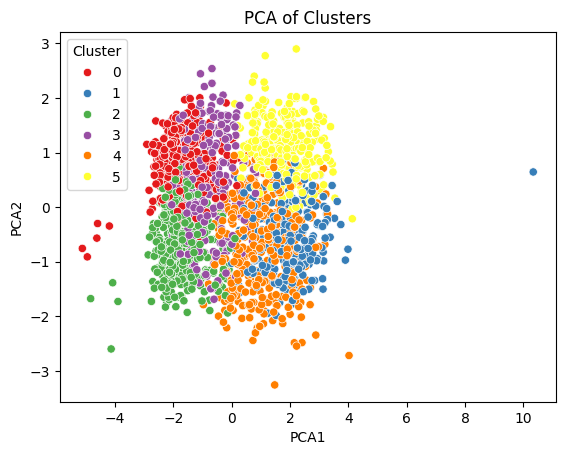

In [113]:
sns.scatterplot(x="PCA1", y="PCA2", hue='Cluster', data=df, palette='Set1')
plt.title('PCA of Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()


In [114]:
cluster_summary

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,49.160326,32944.277174,124.067935,2.366848,3.228261,7.076087,77.116848
1,52.175926,78033.984568,1254.246914,4.719136,8.780864,2.679012,26.632716
2,48.685268,32481.035714,106.823661,2.149554,3.196429,6.676339,24.787946
3,68.312500,43730.546875,172.725000,2.537500,4.053125,5.290625,50.971875
4,59.964539,59643.283688,896.468085,7.933806,7.872340,6.413712,44.718676
5,61.447447,73870.918919,1233.966967,4.570571,8.297297,2.756757,75.891892


In [ ]:
# Cluster 0 High income High Spending  -> Premium customer
# Cluster 4 High web purchases low store purchases -> digital buyers
# Cluster 2 Low income ,low spending  -> Budget Customer


In [115]:
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')  # Save the KMeans model to a file
joblib.dump(scaler, 'scaler.pkl')  # Save the scaler to a file

['scaler.pkl']